In [1]:
!ls

LICENSE
ML
README.md
SpamClassifier_Viz_Muthukrishnan.ipynb
emails.csv
spam-or-ham analysis and visualization.ipynb


In [2]:
!pip install seaborn==0.12.2
!pip install tqdm
!pip install wordcloud
!pip install scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from wordcloud import WordCloud
from collections import Counter


In [4]:
df = pd.read_csv('emails.csv')
print(df.shape)
df.head()

(5172, 3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df = df.drop(['Email No.'], axis=1)
df.head(2)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0


In [6]:
print(df[df['Prediction'] == 0].count())
print(df[df['Prediction'] == 1].count())

the           3672
to            3672
ect           3672
and           3672
for           3672
              ... 
military      3672
allowing      3672
ff            3672
dry           3672
Prediction    3672
Length: 3001, dtype: int64
the           1500
to            1500
ect           1500
and           1500
for           1500
              ... 
military      1500
allowing      1500
ff            1500
dry           1500
Prediction    1500
Length: 3001, dtype: int64


In [7]:
cols = df.columns

cols[0]

'the'

In [8]:
cols = cols.tolist()

In [9]:
text_tmp = []
text = ''
for row_index,row in tqdm(df.iterrows()):
    #print(row)
    
    #print(row['the'])
    
    for col in (cols):
        #print(col)
        if col == 'Prediction': break
        if row[col] > 0:
            int_val = int(row[col])
            #print(int_val)
            for k in range(int_val):
                text += col+" "
        #break
        
    
    #print(text)
    df.loc[row_index, 'possible_text'] = text

    text = ""
    #if i > 2: break

5172it [00:27, 189.30it/s]


In [10]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,possible_text
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,ect a a is i i s s s as re re e e e e t t t t ...
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,1,0,0,the the the the the the the the to to to to to...
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,ect a a a a a a a a in in in in on on i i i i ...
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,to to to to to ect ect ect ect ect ect ect ect...
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,1,0,0,the the the the the the the to to to to to to ...


### Word Cloud Formation for Spam email:

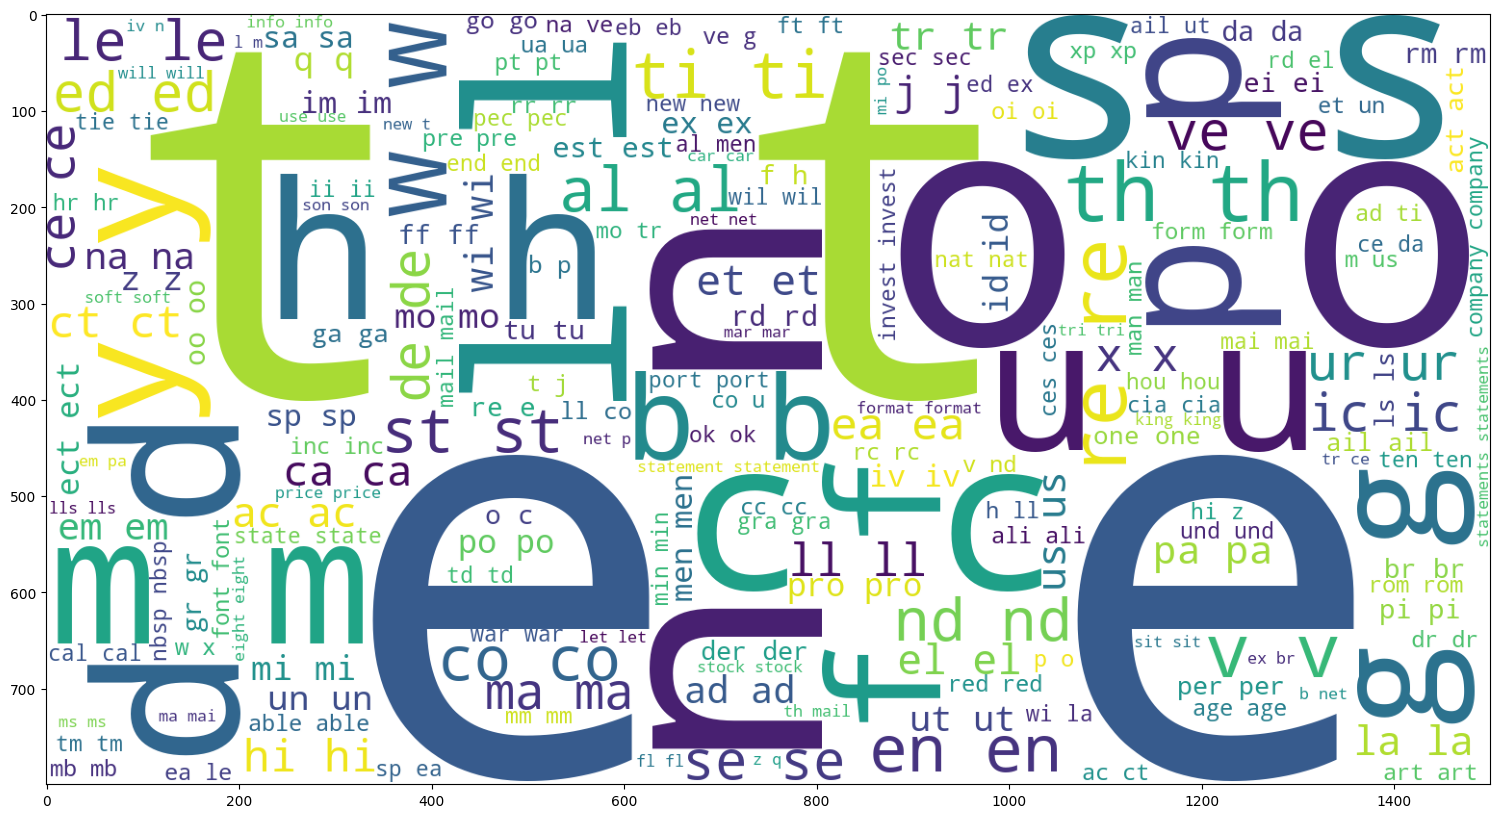

In [11]:
wc = WordCloud(width=1500,height=800,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Prediction']==1]['possible_text'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

### Word Cloud Formation for Non-spam email:

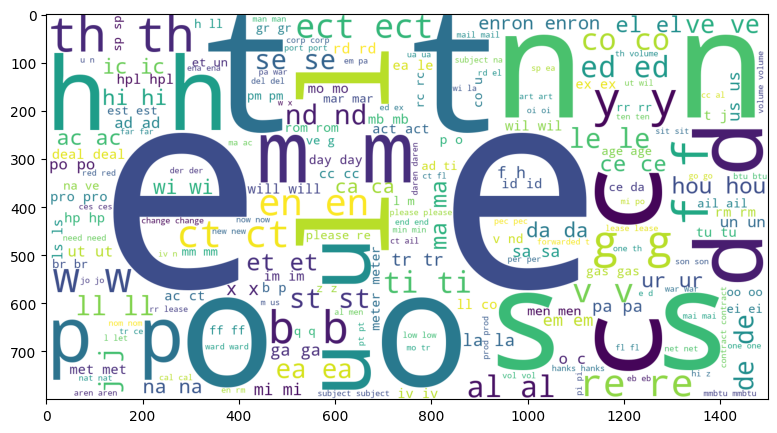

In [12]:
non_spam_wc = wc.generate(df[df['Prediction']==0]['possible_text'].str.cat(sep=" "))
plt.figure(figsize=(12,5))
plt.imshow(non_spam_wc)

In [13]:
spam_word = []
for msg in df[df['Prediction']==1]['possible_text'].tolist():
    for word in msg.split():
        spam_word.append(word)
print(len(spam_word))
Counter(spam_word)
pd.DataFrame(Counter(spam_word).most_common(30))

2188198


,0,1
0,e,151062
1,t,109878
2,a,105425
3,o,103997
4,i,100761
5,n,90840
6,r,89645
7,s,83720
8,l,58852
9,c,54181


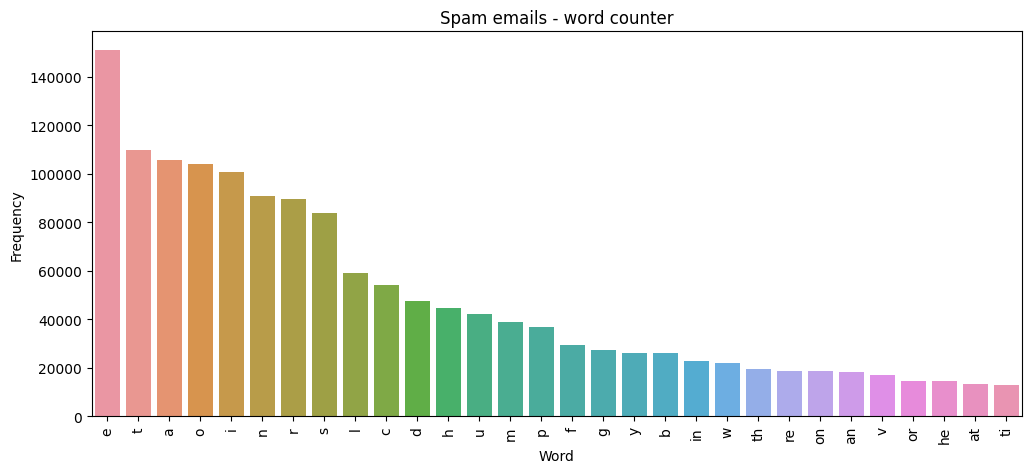

In [14]:
data_frame = pd.DataFrame(Counter(spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.title("Spam emails - word counter")
plt.show()

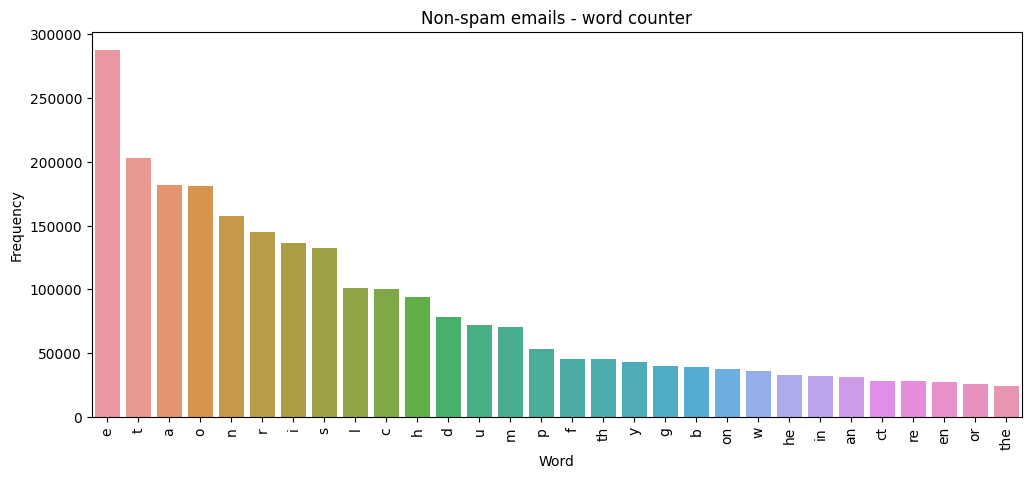

In [15]:
non_spam_word = []
for msg in df[df['Prediction']==0]['possible_text'].tolist():
    for word in msg.split():
        non_spam_word.append(word)
len(non_spam_word)
data_frame2 = pd.DataFrame(Counter(non_spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame2)
plt.xticks(rotation='vertical')
plt.title("Non-spam emails - word counter")

plt.show()

# TSNE 

## Feature Extraction ( TF-IDF)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = df['possible_text'].to_list()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert the TF-IDF matrix to a dense array for better readability
dense_tfidf_matrix = tfidf_matrix.todense()

# Get the feature names (words) corresponding to the columns of the TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for better visualization

df_tfidf = pd.DataFrame(data=dense_tfidf_matrix, columns=feature_names)
print("TF-IDF Matrix:")
print(df_tfidf.shape)

df_tfidf.head()

TF-IDF Matrix:
(5172, 2974)


,abdv,ability,able,about,above,ac,accept,acceptance,accepted,access,...,young,your,yourself,yvette,zajac,zero,zeroed,zivley,zone,zonedubai
0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.01659,0.0,0.021172,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.095290,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.056599,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.manifold import TSNE

# Assuming you have a DataFrame 'df' with your features
# X should be your feature matrix, where each row is a document and each column is a feature
X = df_tfidf  # Assuming 'label' is your spam/non-spam indicator

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a new DataFrame for visualization
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dimension_1', 'Dimension_2'])
df_tsne['Prediction'] = df['Prediction']  # Assuming 'label' is your spam/non-spam indicator


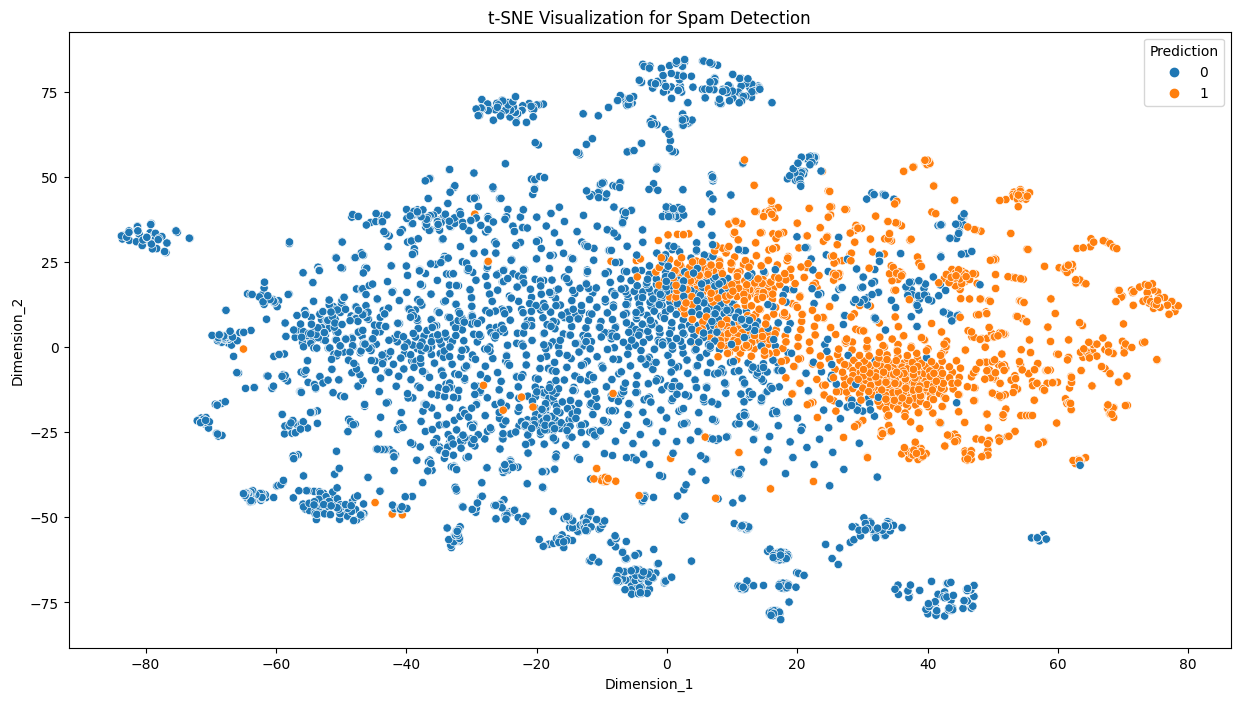

In [18]:

plt.figure(figsize=(15, 8))  # Adjust the values (width, height) as needed

sns.scatterplot(x='Dimension_1', y='Dimension_2', hue='Prediction', data=df_tsne)
plt.title('t-SNE Visualization for Spam Detection')

plt.show()
